In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

In [2]:
#The goal of the task is to design an algorithm that predicts potential interest of an object depending on his parameters
#.csv file alongside with some explanation docs is provided
#Some parameters can be fake and affect the model in a negative way
data = pd.read_csv("round_2.csv")

In [3]:
data.head(1)

,p,target,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
0,1,no,0,0,0,0.0,0,1,0,0.5897,17,2,0,1,1,0,0,1,0.4103


In [4]:
data.drop(["p"], axis = 1, inplace = True)
data["target"] = data["target"].map({"no": 0, "yes":1})
data.head(1)

,target,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
0,0,0,0,0,0.0,0,1,0,0.5897,17,2,0,1,1,0,0,1,0.4103


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
target    1048575 non-null int64
f0        1048575 non-null int64
f1        1048575 non-null int64
f2        1048575 non-null int64
f3        1048575 non-null float64
f4        1048575 non-null int64
f5        1048575 non-null int64
f6        1048575 non-null int64
f7        1048575 non-null float64
f8        1048575 non-null int64
f9        1048575 non-null int64
f10       1048575 non-null int64
f11       1048575 non-null int64
f12       1048575 non-null int64
f13       1048575 non-null int64
f14       1048575 non-null int64
f15       1048575 non-null int64
f16       1048575 non-null float64
dtypes: float64(3), int64(15)
memory usage: 144.0 MB


In [6]:
data.describe()

,target,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.693060e-02,8.502349e+00,9.192504e-01,1.570074e-01,5.185007e-01,1.380902e+00,1.245282e+00,4.221103e+00,7.431517e-01,1.248270e+01,3.393593e+00,9.298683e+00,7.208030e-01,7.208059e-01,1.483580e+00,2.300152e+00,2.164533e+00,2.568483e-01
std,1.290115e-01,3.085617e+01,2.447030e+00,2.230556e+00,4.189593e-01,1.201584e+01,5.783590e-01,1.179580e+01,2.304141e-01,1.322067e+01,2.122728e+00,3.241057e+01,4.486048e-01,4.486034e-01,2.537598e+00,1.346567e+01,2.512940e+00,2.304141e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.766800e-01,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.134000e-02
50%,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.153846e-01,0.000000e+00,1.000000e+00,0.000000e+00,7.961100e-01,9.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.038900e-01
75%,0.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,9.666667e-01,1.000000e+00,1.000000e+00,4.000000e+00,9.486600e-01,1.400000e+01,6.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,4.233200e-01
max,1.000000e+00,2.550000e+02,2.550000e+02,2.550000e+02,1.000000e+00,2.550000e+02,8.000000e+00,2.550000e+02,1.000000e+00,2.380000e+02,7.000000e+00,2.550000e+02,1.000000e+00,1.000000e+00,2.550000e+02,5.100000e+02,2.560000e+02,1.000000e+00


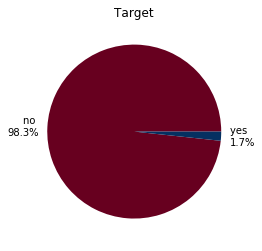

In [7]:
freq_y = len(data[data['target'] == 1]) / len(data)
freq_n = len(data[data['target'] == 0]) / len(data)
series = pd.Series([freq_n, freq_y], index = ['no \n{:.1%}'.format(freq_n), 'yes \n{:.1%}'.format(freq_y)] ,name = 'target')
series.plot(kind = 'pie', colormap = 'RdBu', label = '', title = 'Target')
plt.show()

In [8]:
# We seem major disbalance here, so our metrics should be f1-score
# Lets plot data

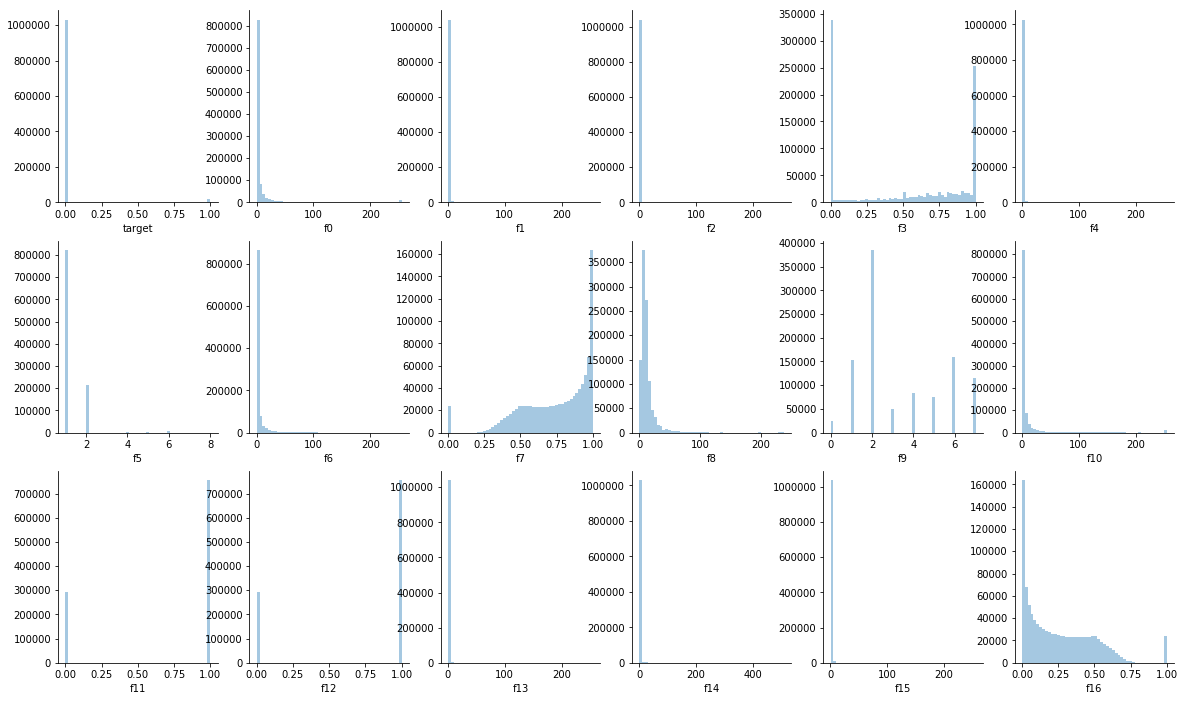

In [9]:
fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize = (20,12))
for i in range(len(data.columns)):
    sns.distplot(data.iloc[:,i], kde = False, bins = 50, ax = ax[i // 6, i % 6])
    sns.despine()

c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


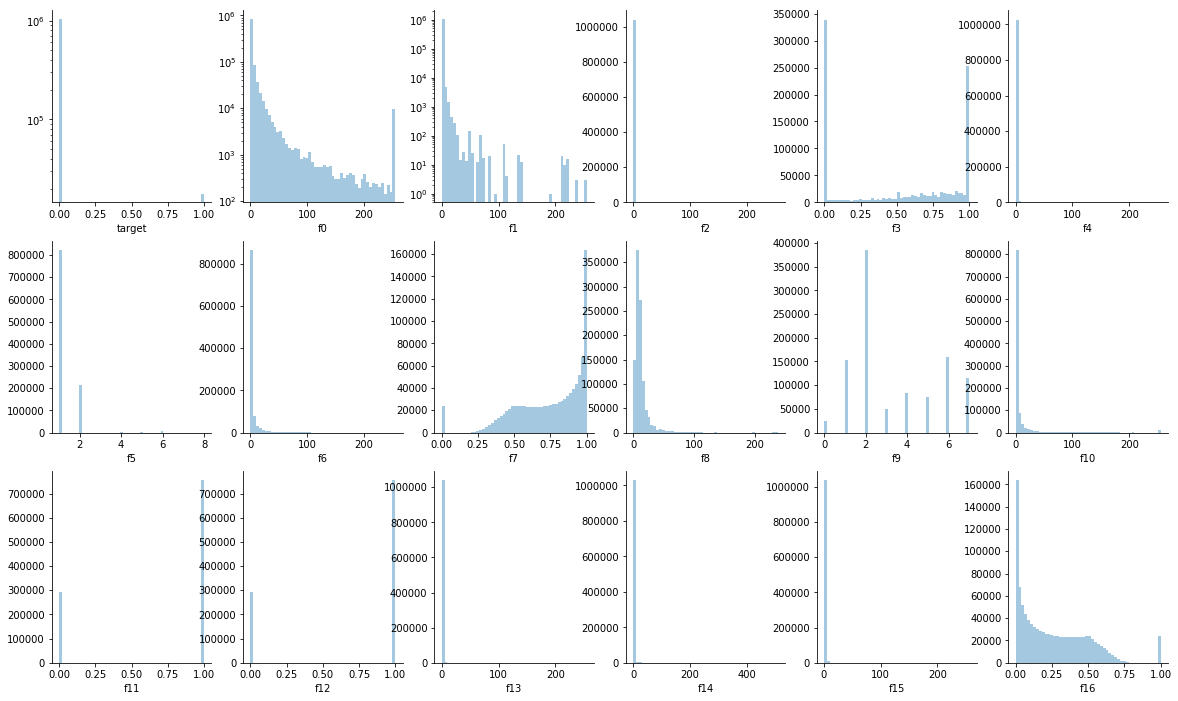

In [10]:
# Maybe we need to use log scale
fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize = (20,12))
for i in range(len(ax)):
    ax[i // 6, i % 6].set(yscale = 'log') #sets y axis to log scale
for i in range(len(data.columns)):
    sns.distplot(data.iloc[:,i], kde = False, bins = 50, ax = ax[i // 6, i % 6])
    sns.despine()

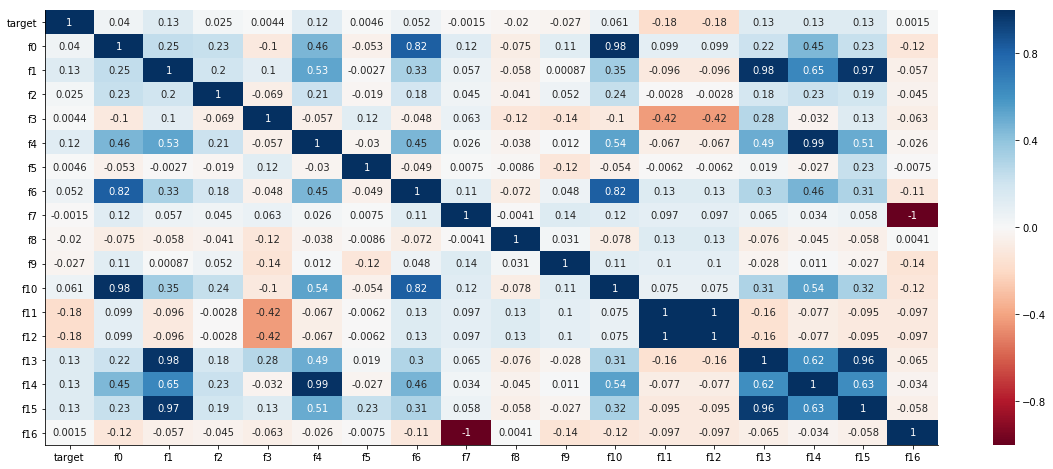

In [11]:
# Lets check the corr matrix
fig, ax = plt.subplots(figsize = (20,8))
sns.heatmap(data.corr(), cmap = 'RdBu', annot = True, ax = ax)
sns.despine()

In [12]:
# We drop f16 because it does not give any additional information. We also drop f7 because it`s 100% fake column. 
# In the description to this dataset was said that there are some fake (generated) columns
data.drop(["f16","f7"], axis = 1, inplace = True)
# corr(F11, F12) = 1
data.drop("f12", axis = 1, inplace = True)

c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


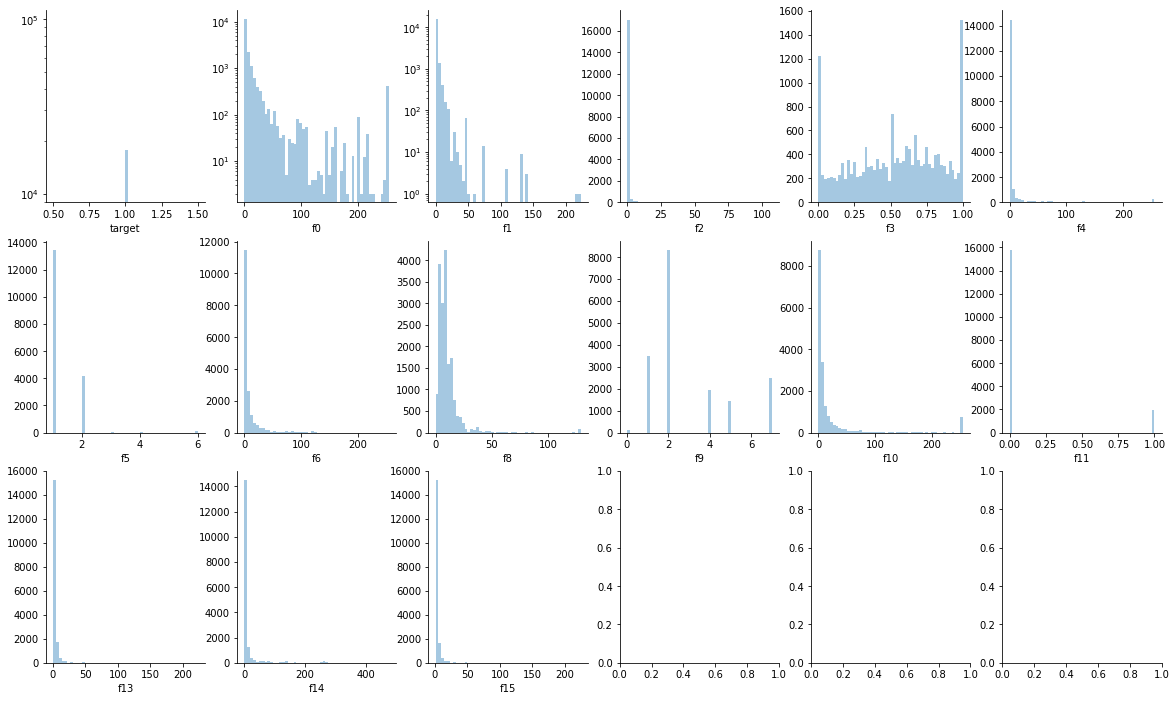

In [13]:
fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize = (20,12))
for i in range(len(ax)):
    ax[i // 6, i % 6].set(yscale = 'log') #sets y axis to log scale
for i in range(len(data.columns)):
    sns.distplot(data[data["target"] == 1].iloc[:,i], kde = False, bins = 50, ax = ax[i // 6, i % 6])
    sns.despine()

In [14]:
# From comparison we see that f3 is very important, because it`s distibution different from general distribution for 
# f3. Also f9 cuz positive do not have f9 = 3 or 6, for the same reason f5 <= 6 for positive classes
# and also f14, f11. We will note that later in model training

In [15]:
# From plot and dataset describe we see that there are columns with range [0,255]. Seems like it`s pixels.
# Lets try to visualise
columns_pixels = [col for col in data.columns if (max(data[col]) > 10) & (max(data[col]) < 400)]

In [16]:
pictures_negative = [pict.reshape(3,3) for pict in np.array(data[data["target"]==0][columns_pixels])]
pictures_positive = [pict.reshape(3,3) for pict in np.array(data[data["target"]==1][columns_pixels])]

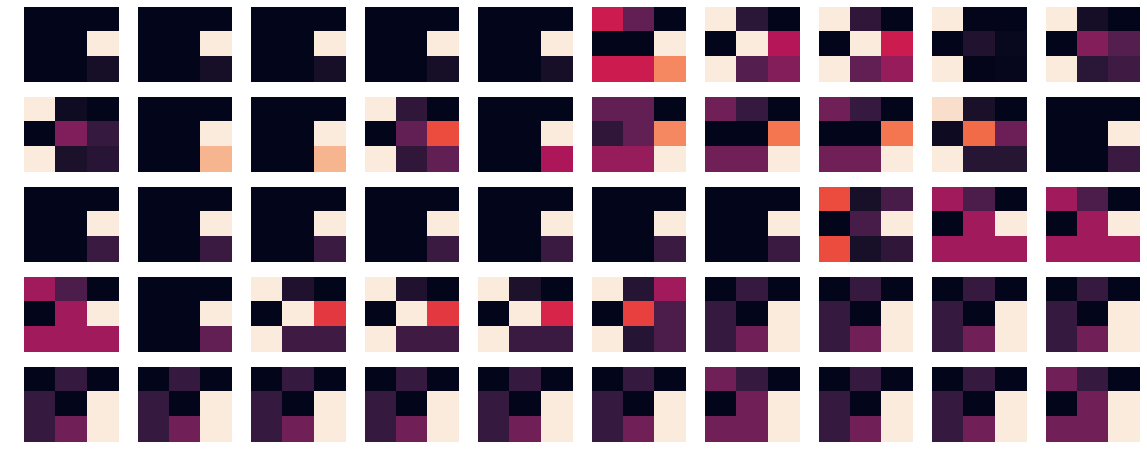

In [17]:
fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize = (20,8))
for i in range(len(pictures_negative)): 
    axi = ax[i // 10, i % 10]
    axi.axis('off')
    sns.heatmap(pictures_negative[i], ax = axi, cbar = 0)
    sns.axes_style()
    sns.despine()
    if i >=49:
        break

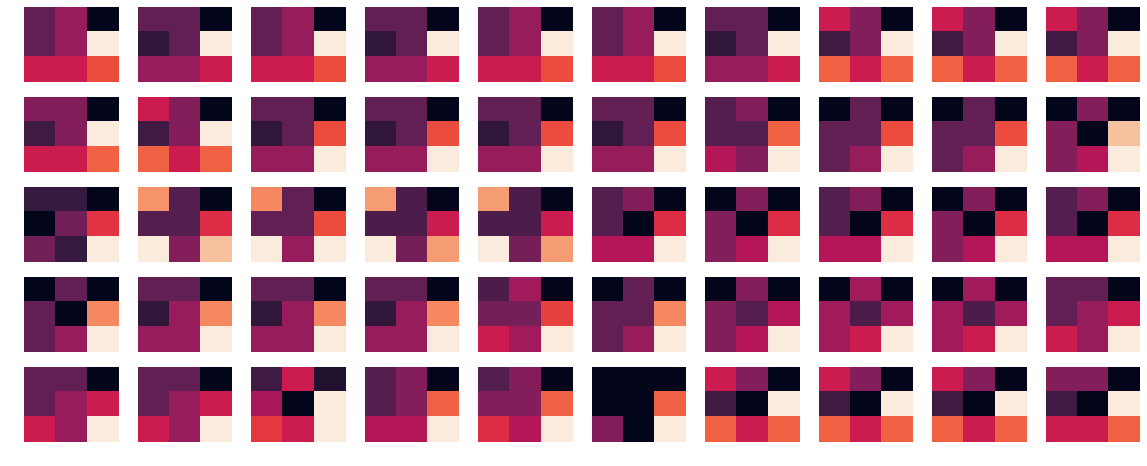

In [18]:
fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize = (20,8))
for i in range(len(pictures_positive)): 
    axi = ax[i // 10, i % 10]
    axi.axis('off')
    sns.heatmap(pictures_positive[i], ax = axi, cbar = 0)
    sns.axes_style()
    sns.despine()
    if i >=49:
        break

In [19]:
# Seems like these columns is not enough to classify, but still we can see that positive class has more intense pictures
# lets try to model it with LR and tree
zoo = [(LogisticRegression(), "LR"),(DecisionTreeClassifier(max_depth = 10), "Tree")]
def zoo_score(train, zoo):
    X,y = train.iloc[:,1:], train.iloc[:,0]
    for clf, name in zoo:
        print(name, ": ", np.mean(cross_val_score(clf, X, y, cv = 4, scoring = "f1")))

In [20]:
columns = ["target"]
for el in columns_pixels:
    columns.append(el)

In [21]:
zoo_score(data[columns], zoo)

c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR :  0.011533380008338874
Tree :  0.18786343070576686


In [22]:
# Now it is obvious that these columns are not enough. From previous analysys
# we rember that f3, f5, f9, f11, f14 are super important. Lets see
columns.append("f3")
columns.append("f5")
columns.append("f9")
columns.append("f11")
columns.append("f14")
zoo = [(DecisionTreeClassifier(max_depth = 10), "Tree")]
zoo_score(data[columns], zoo)

Tree :  0.757026904591186


In [23]:
# Maybe we dont even need pixels? 
zoo_score(data[["target", "f3", "f5", "f9", "f11", "f14"]], zoo)

Tree :  0.7270112561814944


In [24]:
# Pixels gives not so much. 
# Lets get dataframe with only positive values
data_pos = data[data["target"] == 1]

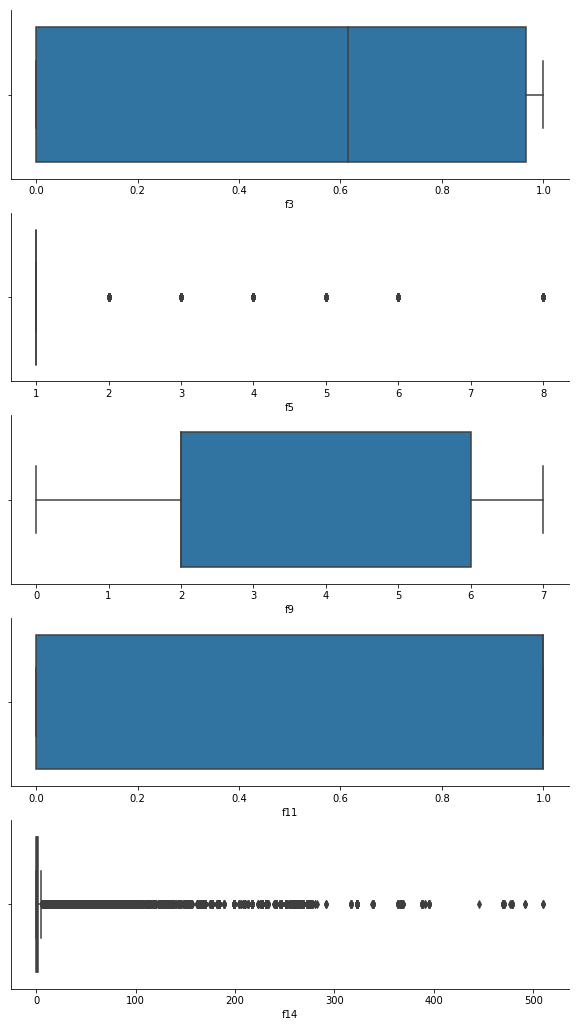

In [25]:
# We for outliers separately for pixels and the rest
#TAKE A CLOSE LOOK AT X - AXIS!!!
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (10,18))
columns_for_outliers = ["f3", "f5", "f9", "f11", "f14"]

for i in range(len(columns_for_outliers)):
    sns.boxplot(data[columns_for_outliers[i]], ax = ax[i])
    sns.despine()

In [ ]:
# This is not done yet. We need to add some imbalanced data techniques such as under-sampling, over-sampling, clustering.
# Also we need to analyse outliers, add more models (it is easy, function for zoo is ready), little bit more visualization. 
# Maybe try some stacking, ensembles